# Market Manipulation Simulation Analysis

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

## Summary

In [3]:
summary_log_file = "../log/market_manipulation/summary_log.bz2"
summary = pd.read_pickle(summary_log_file)
summary

,AgentID,AgentStrategy,EventType,Event
0,1,ValueAgent,STARTING_CASH,10000000.0
1,2,ValueAgent,STARTING_CASH,10000000.0
2,3,ValueAgent,STARTING_CASH,10000000.0
3,4,ValueAgent,STARTING_CASH,10000000.0
4,5,ValueAgent,STARTING_CASH,10000000.0
...,...,...,...,...
20679,5177,HeuristicBeliefLearningAgent,FINAL_CASH_POSITION,10005200.0
20680,5177,HeuristicBeliefLearningAgent,ENDING_CASH,10005200.0
20681,5177,HeuristicBeliefLearningAgent,FINAL_VALUATION,5200.0
20682,5178,SpoofingAgent,FINAL_CASH_POSITION,-6572.0


In [4]:
summary['EventType'].unique()

array(['STARTING_CASH', 'FINAL_CASH_POSITION', 'ENDING_CASH',
       'FINAL_VALUATION'], dtype=object)

In [5]:
summary[summary['AgentID'] == 42]

,AgentID,AgentStrategy,EventType,Event
41,42,ValueAgent,STARTING_CASH,1.000000e+07
5301,42,ValueAgent,FINAL_CASH_POSITION,1.084559e+08
5302,42,ValueAgent,ENDING_CASH,9.766189e+06
5303,42,ValueAgent,FINAL_VALUATION,9.745562e+00


## Fundamental Price

In [7]:
fundamental_log_file = "../log/market_manipulation/fundamental_XXX.bz2"
fundamental = pd.read_pickle(fundamental_log_file)
fundamental

,FundamentalValue
FundamentalTime,
2022-02-26 09:30:00.000000000,100000.0
2022-02-26 09:30:00.000036396,100000.0
2022-02-26 09:30:00.000178475,100000.0
2022-02-26 09:30:00.000193187,100000.0
2022-02-26 09:30:00.000291001,100000.0
...,...
2022-02-26 11:29:59.425427368,100033.0
2022-02-26 11:29:59.486376128,100032.0
2022-02-26 11:29:59.488219561,100032.0


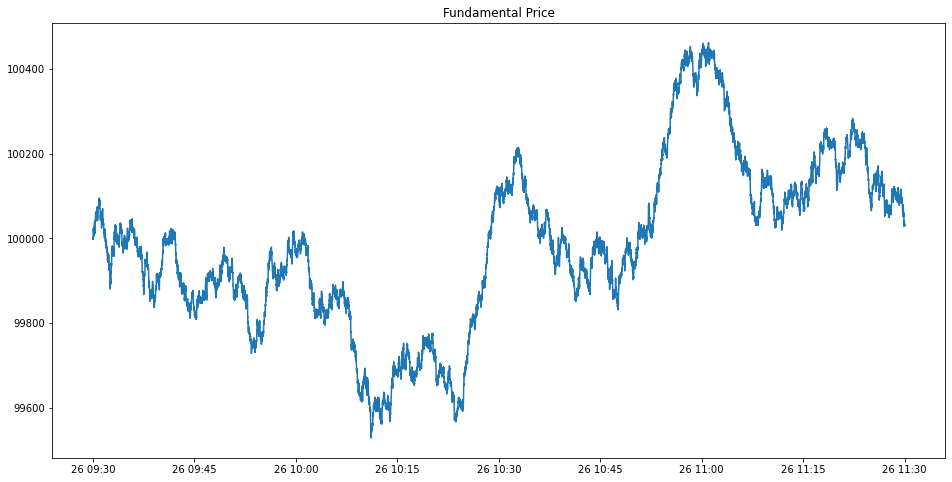

In [8]:
fig = plt.figure(figsize=(16, 8))
plt.plot(fundamental['FundamentalValue'])
plt.title('Fundamental Price') 
plt.show()

## Exchange

In [9]:
exchange_log_file = "../log/market_manipulation/EXCHANGE_AGENT.bz2"
exchange = pd.read_pickle(exchange_log_file)
exchange

,EventType,Event
EventTime,,
NaT,AGENT_TYPE,ExchangeAgent
2022-02-26 00:00:00.000001351,WHEN_MKT_OPEN,1663
2022-02-26 00:00:00.000001351,WHEN_MKT_CLOSE,1663
2022-02-26 00:00:00.000004210,WHEN_MKT_OPEN,3445
2022-02-26 00:00:00.000004210,WHEN_MKT_CLOSE,3445
...,...,...
2022-02-26 11:30:39.867786201,QUERY_ORDER_STREAM,5141
2022-02-26 11:30:42.863332516,QUERY_SPREAD,13
2022-02-26 11:30:43.025866437,QUERY_SPREAD,34


In [10]:
exchange['EventType'].unique()

array(['AGENT_TYPE', 'WHEN_MKT_OPEN', 'WHEN_MKT_CLOSE',
       'MARKET_DATA_SUBSCRIPTION_REQUEST', 'QUERY_SPREAD',
       'QUERY_ORDER_STREAM', 'LIMIT_ORDER', 'ORDER_ACCEPTED', 'BEST_BID',
       'ORDER_EXECUTED', 'LAST_TRADE', 'BEST_ASK', 'MARKET_ORDER',
       'CANCEL_ORDER', 'ORDER_CANCELLED', 'QUERY_TRANSACTED_VOLUME'],
      dtype=object)

In [16]:
cancelled = exchange[exchange['EventType'] == 'CANCEL_ORDER']
cancelled['AgentID'] = cancelled['Event'].apply(lambda x: x['agent_id'])
cancelled[cancelled['AgentID'] == 5178]

/tmp/ipykernel_18049/413454260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['AgentID'] = cancelled['Event'].apply(lambda x: x['agent_id'])


,EventType,Event,AgentID
EventTime,,,
2022-02-26 09:30:03.503715160,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178
2022-02-26 09:30:04.589383572,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178
2022-02-26 09:30:08.037174160,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178
2022-02-26 09:30:09.168814438,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178
2022-02-26 09:30:11.631219175,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178
...,...,...,...
2022-02-26 11:29:49.680704124,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178
2022-02-26 11:29:50.851133233,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178
2022-02-26 11:29:53.041876466,CANCEL_ORDER,"{'agent_id': 5178, 'time_placed': '2022-02-26T...",5178


## Orderbook

In [18]:
orderbook_log_file = "../log/market_manipulation/ORDERBOOK_XXX_FULL.bz2"
orderbook = pd.read_pickle(orderbook_log_file)
orderbook

,98955,99032,99036,99101,99109,99120,99166,99179,99186,99204,...,100649,100656,100690,100695,100708,100727,100743,100771,100847,100923
QuoteTime,,,,,,,,,,,,,,,,,,,,,
2022-02-26 09:30:00.000054593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000167650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000169522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000180134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 09:30:00.000180884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26 11:29:58.961687310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 11:29:59.425886162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-26 11:29:59.491762057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from util.formatting.convert_order_book import process_orderbook
processed_orderbook = process_orderbook(orderbook, 1)
processed_orderbook

Processing order book: 100%|██████████████| 44104/44104 [00:10<00:00, 4068.51it/s]


,ask_price_1,ask_size_1,bid_price_1,bid_size_1
0,1.000000e+10,1.000000e+10,9.994000e+04,3.200000e+01
1,1.000000e+10,1.000000e+10,9.994000e+04,2.000000e+00
2,9.994000e+04,4.500000e+01,-1.000000e+10,-1.000000e+10
3,9.994000e+04,6.800000e+01,-1.000000e+10,-1.000000e+10
4,9.994000e+04,8.900000e+01,-1.000000e+10,-1.000000e+10
...,...,...,...,...
44099,1.000920e+05,5.000000e+00,1.000910e+05,2.600000e+01
44100,1.000910e+05,1.400000e+01,1.000900e+05,2.600000e+01
44101,1.000920e+05,5.000000e+00,1.000910e+05,6.000000e+00
44102,1.000910e+05,3.200000e+01,1.000900e+05,2.600000e+01


In [20]:
mid_price = (processed_orderbook['ask_price_1'] + processed_orderbook['bid_price_1']) / 2
mid_price.index = orderbook.index

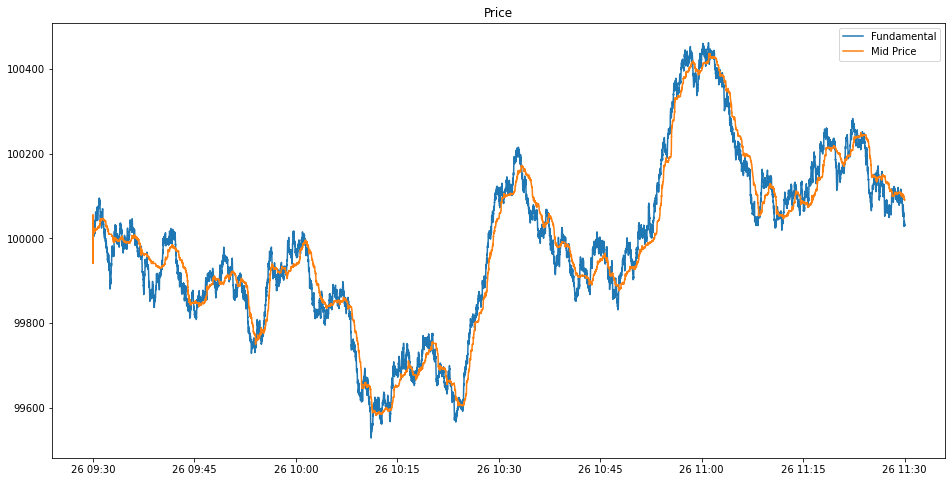

In [21]:
fig = plt.figure(figsize=(16, 8))
plt.plot(fundamental['FundamentalValue'], label="Fundamental")
plt.plot(mid_price[750:], label="Mid Price")
plt.legend()
plt.title('Price') 
plt.show()

## Market Manipulation Agent

In [22]:
spoofer_log_file = "../log/market_manipulation/SpoofingAgent5178.bz2"
spoofer = pd.read_pickle(spoofer_log_file)
spoofer

,EventType,Event
EventTime,,
NaT,AGENT_TYPE,SpoofingAgent
NaT,STARTING_CASH,10000000
2022-02-26 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2022-02-26 09:30:00.007092268,ORDER_SUBMITTED,"{'agent_id': 5178, 'time_placed': '2022-02-26T..."
2022-02-26 09:30:00.021167619,ORDER_EXECUTED,"{'agent_id': 5178, 'time_placed': '2022-02-26T..."
...,...,...
2022-02-26 11:29:58.968724985,FINAL_HOLDINGS,"{ XXX: 100, CASH: -6572 }"
2022-02-26 11:29:58.968724985,FINAL_CASH_POSITION,-6572
2022-02-26 11:29:58.968724985,MARK_TO_MARKET,100 XXX @ 100092 == 10009200


In [23]:
spoofer['EventType'].unique()

array(['AGENT_TYPE', 'STARTING_CASH', 'HOLDINGS_UPDATED',
       'ORDER_SUBMITTED', 'ORDER_EXECUTED', 'ORDER_ACCEPTED',
       'CANCEL_SUBMITTED', 'ORDER_CANCELLED', 'FINAL_HOLDINGS',
       'FINAL_CASH_POSITION', 'MARK_TO_MARKET', 'MARKED_TO_MARKET',
       'ENDING_CASH'], dtype=object)

In [30]:
spoofer.iloc[313]['Event']

{'agent_id': 5178,
 'time_placed': '2022-02-26T09:33:05.437896042',
 'symbol': 'XXX',
 'quantity': 1000,
 'is_buy_order': True,
 'order_id': 6433,
 'fill_price': None,
 'tag': 'spoofing',
 'limit_price': 99949}